In [1]:
%cd "/content"

from google.colab import drive
drive.mount('/content/drive/')
%load_ext autoreload
%autoreload 2

%cd "/content/drive/MyDrive/VLR/project"

/content
Mounted at /content/drive/
/content/drive/MyDrive/VLR/project


In [2]:
# !mkdir -p data/sets/nuimages  # Make the directory to store the nuImages dataset in.

# !mkdir -p data/sets/nuscenes

# !wget https://www.nuscenes.org/data/nuimages-v1.0-mini.tgz  # Download the nuImages mini split.

# !tar -xf nuimages-v1.0-mini.tgz -C data/sets/nuimages  # Uncompress the nuImages mini split.

# !wget https://www.nuscenes.org/data/v1.0-mini.tgz  # Download the nuScenes mini split.

# !tar -xf v1.0-mini.tgz -C data/sets/nuscenes  # Uncompress the nuScenes mini split.

!pip install nuscenes-devkit &> /dev/null  # Install nuscenes.

!pip install fvcore

!pip install -U lyft_dataset_sdk

     |████████████████████████████████| 50 kB 3.1 MB/s 
     |████████████████████████████████| 596 kB 9.8 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220414-py3-none-any.whl size=61211 sha256=379ad1a86e710e9cf5dc51c3e846c5cfa0530a3a11ff9ce369e03477e6e8b157
  Stored in directory: /root/.cache/pip/wheels/df/f4/b8/7b5df8b6722f4c72315ce70c31aa693e00cef6a5056149bd28
Successfully built fvcore
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 64 kB 2.1 MB/s 
     |████████████████████████████████| 1.4 MB 29.8 MB/s 
     |████████████████████████████████| 96 kB 7.3 MB/s 
     |████████████████████████████████| 843 kB 54.6 MB/s 
     |████████████████████████████████| 69 kB 9.2 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.3


In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from nuimages import NuImages

nuim = NuImages(dataroot='data/sets/nuimages', version='v1.0-mini', verbose=True, lazy=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loading nuImages tables for version v1.0-mini...
Done loading in 0.000 seconds (lazy=True).


In [ ]:
nuim.category[0]

Loaded 25 category(s) in 0.675s,


{'description': 'All animals, e.g. cats, rats, dogs, deer, birds.',
 'name': 'animal',
 'token': '63a94dfa99bb47529567cd90d3b58384'}

In [ ]:
nuim.table_names

['attribute',
 'calibrated_sensor',
 'category',
 'ego_pose',
 'log',
 'object_ann',
 'sample',
 'sample_data',
 'sensor',
 'surface_ann']

In [ ]:
sample_idx = 0
sample = nuim.sample[sample_idx]
sample

Loaded 50 sample(s) in 0.000s,


{'key_camera_token': '0128b121887b4d0d86b8b1a43ac001e9',
 'log_token': '4ed5d1230fcb48d39db895f754e724f9',
 'timestamp': 1535352274870176,
 'token': '09acd654cb514bdeab8e3afedad74fca'}

In [ ]:
sample = nuim.get('sample', sample['token'])
sample

{'key_camera_token': '0128b121887b4d0d86b8b1a43ac001e9',
 'log_token': '4ed5d1230fcb48d39db895f754e724f9',
 'timestamp': 1535352274870176,
 'token': '09acd654cb514bdeab8e3afedad74fca'}

In [ ]:
sample_idx_check = nuim.getind('sample', sample['token'])
assert sample_idx == sample_idx_check

In [ ]:
key_camera_token = sample['key_camera_token']
print(key_camera_token)

0128b121887b4d0d86b8b1a43ac001e9


In [ ]:
nuim.render_image(key_camera_token, annotation_type='all', with_category=False, with_attributes=False, box_line_width=-1, render_scale=5)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
object_tokens, surface_tokens = nuim.list_anns(sample['token'])

Printing object annotations:
06eed0ca8b164b84bbb2851de1ed2c13 vehicle.car ['vehicle.moving']
0e8ba57c7b69482c88319f5c1b4deeb0 movable_object.trafficcone []
11ec9a46540443339e2e38afbe31f7b1 human.pedestrian.adult ['pedestrian.standing']
4b27e4a70d464cb2a2f33d5dbcf85094 human.pedestrian.adult ['pedestrian.moving']
4c76bc9ee7da40668f1d4b294209ae3b human.pedestrian.adult ['pedestrian.standing']
4e61ccd6905644adb0556e1f336cee79 movable_object.barrier []
584cb4bd0e7c4a0b8b1169191ca828a1 vehicle.car ['vehicle.moving']
677a87b7df1a4ee7a7a36bab569cccbd human.pedestrian.adult ['pedestrian.moving']
683e330396134c6393fd77187194990c human.pedestrian.adult ['pedestrian.moving']
82e0c68c0f2440bcb041a51a6f116513 human.pedestrian.adult ['pedestrian.moving']
8dc2b24b1a69434a8aade0cb4e308e8e vehicle.car ['vehicle.moving']
924572ff00404ae59d1ee2f6f6c92274 human.pedestrian.adult ['pedestrian.moving']
9b8ea679730b43d7b6631ceeb56e0ccf human.pedestrian.adult ['pedestrian.moving']
a457fc08800444bc83900e3a12b00

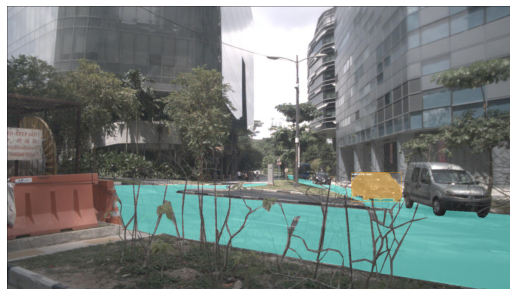

In [ ]:
nuim.render_image(key_camera_token, with_category=True, object_tokens=[object_tokens[0]], surface_tokens=[surface_tokens[0]])

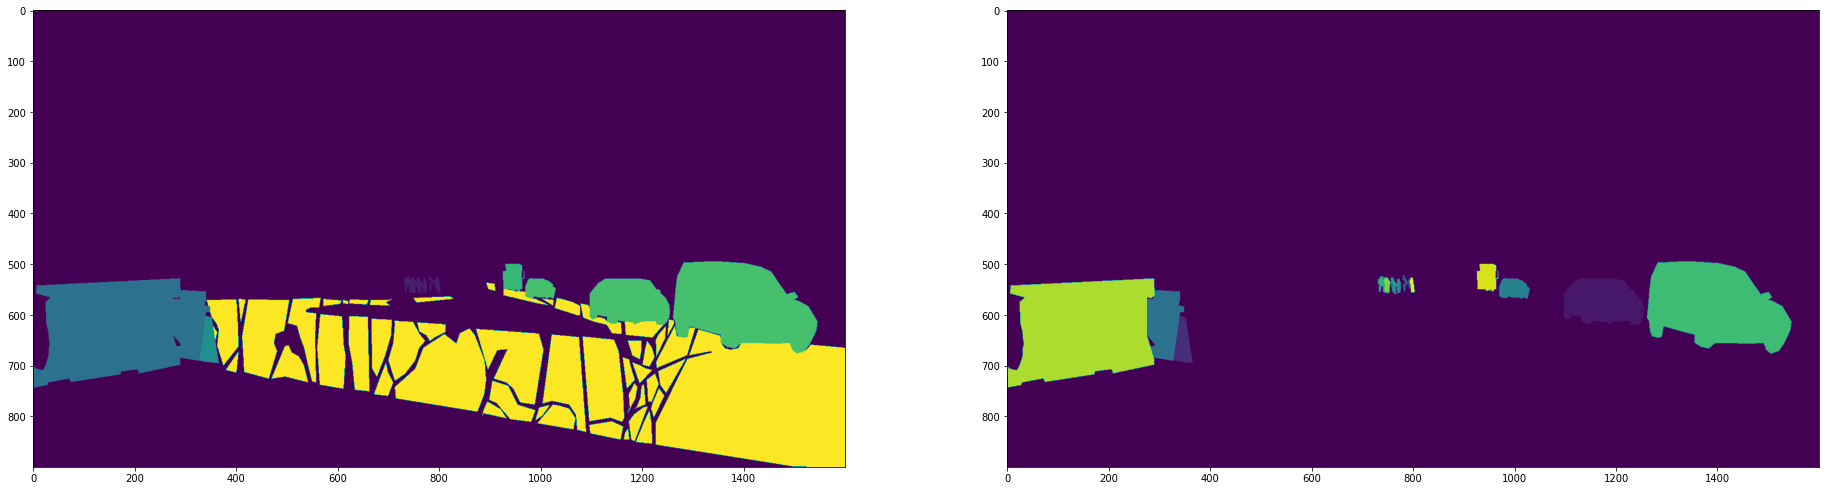

In [ ]:
import matplotlib.pyplot as plt

semantic_mask, instance_mask = nuim.get_segmentation(key_camera_token)

plt.figure(figsize=(32, 9))

plt.subplot(1, 2, 1)
plt.imshow(semantic_mask)
plt.subplot(1, 2, 2)
plt.imshow(instance_mask)

plt.show()

In [ ]:
%cd "/content/drive/MyDrive/VLR/project"
!python assert_download.py

/content/drive/MyDrive/VLR/project
Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.695 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.
Checking that sample_data files are complete...
100% 31206/31206 [00:14<00:00, 2217.41it/s]
Checking that map files are complete...
100% 4/4 [00:00<00:00, 2306.46it/s]


In [15]:
!python test.py

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.563 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
torch.Size([3, 7, 200, 200])
torch.Size([3, 200, 200]

In [ ]:
import numpy as np

a = np.